In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv
/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv


In [2]:
import pandas as pd

# Load datasets
true_news = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv')
fake_news = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv')

print(true_news.info)


<bound method DataFrame.info of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuter

In [3]:
# Examine true news data
print("True News Dataset:")
print(true_news.head())
print("\nShape:", true_news.shape)
print("\nColumns:", true_news.columns)
print("\nSubject value counts:")
print(true_news['subject'].value_counts())

# Examine fake news data
print("\n\nFake News Dataset:")
print(fake_news.head())
print("\nShape:", fake_news.shape)
print("\nColumns:", fake_news.columns)
print("\nSubject value counts:")
print(fake_news['subject'].value_counts())

True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Shape: (21417, 4)

Columns: Index(['title', 'text', 'subject', 'date'], dtype=

In [4]:
# Add labels
true_news['label'] = 0  # 0 for real news
fake_news['label'] = 1  # 1 for fake news

In [5]:
# Combine datasets
df = pd.concat([true_news, fake_news], axis=0)
print("combined rows and columns = "+ str(df.shape))
df.head(2)

combined rows and columns = (44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0


In [6]:
# Check for missing values
print("\nMissing values in combined dataset:")
print(df.isnull().sum())


Missing values in combined dataset:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [7]:
df['text_length'] = df['text'].apply(len)
print("\nText length statistics:")
print(df['text_length'].describe())


Text length statistics:
count    44898.000000
mean      2469.109693
std       2171.617091
min          1.000000
25%       1234.000000
50%       2186.000000
75%       3105.000000
max      51794.000000
Name: text_length, dtype: float64


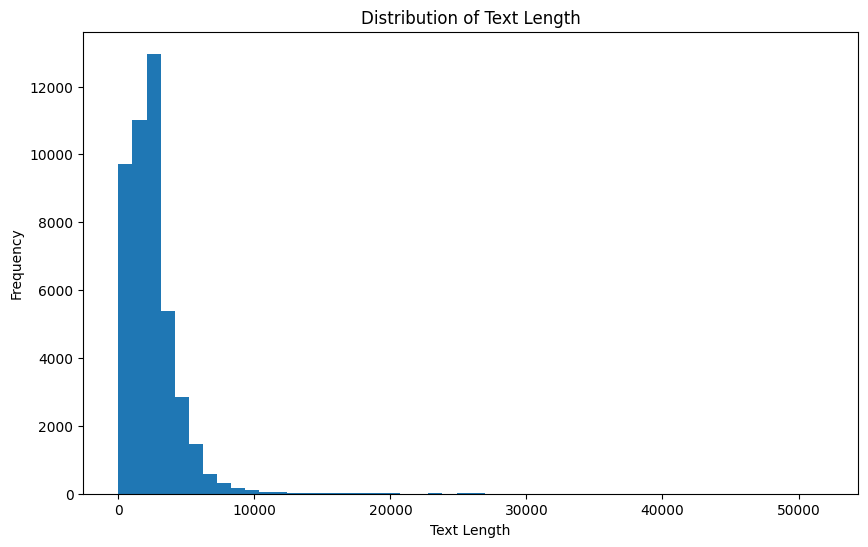

In [8]:
# Visualize text length distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df['text_length'].plot(bins=50, kind='hist')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.show()



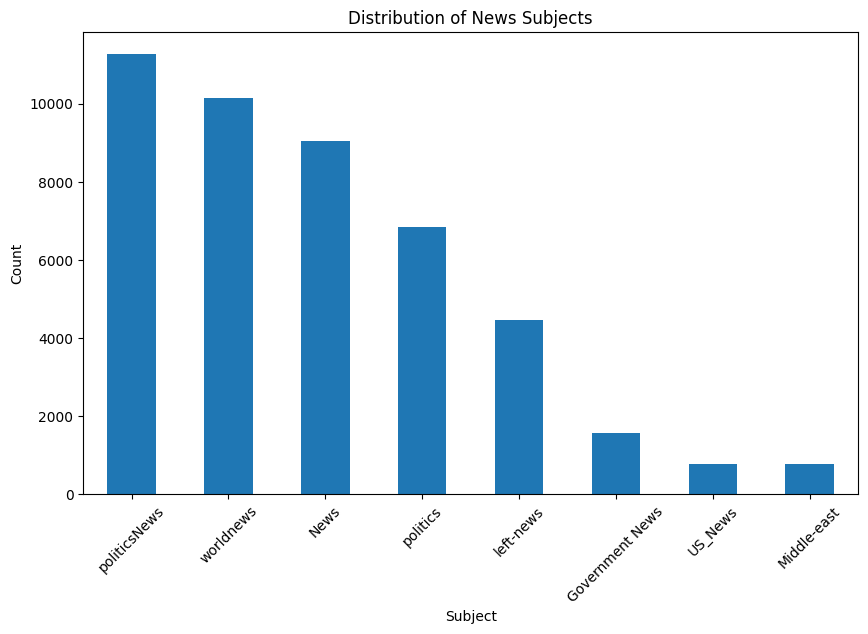


Subject counts:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [10]:
# Plot subject distribution
plt.figure(figsize=(10,6))
df['subject'].value_counts().plot(kind='bar')
plt.title('Distribution of News Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Print value counts
print("\nSubject counts:")
print(df['subject'].value_counts())

In [11]:
df.head()

,title,text,subject,date,label,text_length,title_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,5204,69


In [12]:
# Shuffle the dataset to randomize order
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

X = df['text']  # Input: News articles
y = df['label']  # Output: 0 (Real) or 1 (Fake)

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [14]:
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

# Check class distribution in training and test sets
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set size: 35918
Test set size: 8980

Training set class distribution:
label
1    0.523749
0    0.476251
Name: proportion, dtype: float64

Test set class distribution:
label
1    0.519933
0    0.480067
Name: proportion, dtype: float64


In [18]:
import os
os.environ['NLTK_DATA'] = '/kaggle/input/nltk-data/nltk_data'  # Path to NLTK data in Kaggle

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [21]:
import re
def preprocess_text(text):
   
   
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
   
    return ' '.join(tokens)
    
    


In [22]:

# Apply preprocessing to a sample first to check
sample_text = X_train.iloc[1]
print("\nOriginal text:", sample_text)
print("\nProcessed text:", preprocess_text(sample_text))


Original text: Jeb Bush just unofficially placed himself on team  Democrat Potential GOP presidential candidate Jeb Bush is calling on Congress to confirm attorney general nominee Loretta Lynch, whose confirmation hearings took place in front of the Senate Judiciary Committee in January. In February, Lynch was voted out of the committee and approved 12-8. Due to the legislative schedule and fighting over bills already in motion, a full Senate vote on her confirmation has not yet taken place. More from POLITICO: I think presidents have the right to pick their team,  Bush said, according to reports of his stop at the  Politics and Pie  forum in Concord, New Hampshire, on Thursday night.A Senate fight over a sex-trafficking bill that includes a controversial abortion provision has held up Lynch s nomination for 160 days since Obama announced his choice last Nov. 8, but Minority Leader Sen. Harry Reid (D-Nev.) is threatening to break protocol and force a vote on the Senate floor. If someo

In [23]:
# Optimized application to the dataframe
print("Preprocessing training data...")
X_train_processed = X_train.apply(preprocess_text)
print("Preprocessing test data...")
X_test_processed = X_test.apply(preprocess_text)

Preprocessing training data...
Preprocessing test data...


count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: word_count, dtype: float64


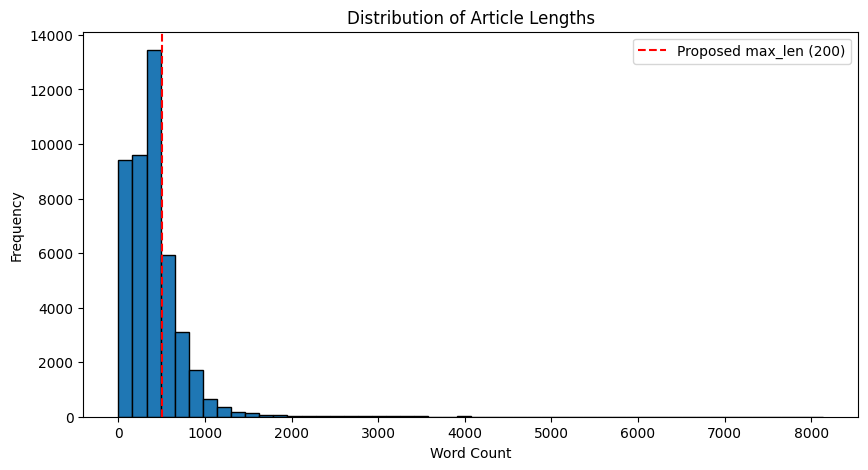

In [24]:
# Calculate word counts for all articles
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Generate statistics and histogram
print(df['word_count'].describe())
plt.figure(figsize=(10, 5))
plt.hist(df['word_count'], bins=50, edgecolor='black')
plt.axvline(x=500, color='red', linestyle='--', label='Proposed max_len (200)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Article Lengths')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer (limit vocabulary to top 10,000 words)
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_processed)  # Learn vocabulary from training data

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train_processed)
X_test_seq = tokenizer.texts_to_sequences(X_test_processed)

# Pad sequences to ensure uniform length (e.g., 200 words per article)
max_len = 500  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Check shapes
print("Training data shape:", X_train_pad.shape)  # (num_samples, max_len)
print("Test data shape:", X_test_pad.shape)

Training data shape: (35918, 500)
Test data shape: (8980, 500)


**SIMPLE RNN**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model_rnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train_pad, y_train, epochs=5, validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 252s 245ms/step - accuracy: 0.5095 - loss: 0.6973 - val_accuracy: 0.4713 - val_loss: 0.7447
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 246s 244ms/step - accuracy: 0.4973 - loss: 0.7064 - val_accuracy: 0.6222 - val_loss: 0.6713
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 246s 243ms/step - accuracy: 0.6658 - loss: 0.6355 - val_accuracy: 0.6704 - val_loss: 0.6250
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 244s 242ms/step - accuracy: 0.6700 - loss: 0.6270 - val_accuracy: 0.6707 - val_loss: 0.6229
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 245s 243ms/step - accuracy: 0.6687 - loss: 0.6273 - val_accuracy: 0.6726 - val_loss: 0.6219


In [28]:
y_pred_prob = model_rnn.predict(X_test_pad)  # Probabilities (0 to 1)
y_pred = (y_pred_prob > 0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step


In [30]:
# Calculate all metrics
metrics = {
    'Accuracy': model_rnn.evaluate(X_test_pad, y_test, verbose=0)[1],
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'Confusion Matrix': confusion_matrix(y_test, y_pred),
    'mAP': average_precision_score(y_test, y_pred_prob),
    'IoU': (np.logical_and(y_test, y_pred).sum() / 
           np.logical_or(y_test, y_pred).sum())  # Fixed IoU calculation
}

# 4. Print Results
print("Simple RNN Metrics:")
for metric, value in metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

Simple RNN Metrics:
Accuracy: 0.6636
Precision: 0.6898
Recall: 0.6415
F1-score: 0.6647
Confusion Matrix:
[[2964 1347]
 [1674 2995]]
mAP: 0.6799
IoU: 0.3343


**Bi-RNN**

In [35]:
from tensorflow.keras.layers import Bidirectional

model_birnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(SimpleRNN(64, return_sequences=True)),  # Wrapped in Bidirectional()
    Bidirectional(SimpleRNN(32)),                         # Bidirectional layer
    Dense(1, activation='sigmoid')
])

In [36]:
model_birnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_birnn = model_birnn.fit(
    X_train_pad, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 351s 342ms/step - accuracy: 0.9824 - loss: 0.0666 - val_accuracy: 0.9964 - val_loss: 0.0196
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 333s 330ms/step - accuracy: 0.9987 - loss: 0.0065 - val_accuracy: 0.9967 - val_loss: 0.0180
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 386s 334ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9964 - val_loss: 0.0226
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 336s 333ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9967 - val_loss: 0.0204
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 333s 329ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9964 - val_loss: 0.0213


In [37]:
# Predictions
y_pred_prob_birnn = model_birnn.predict(X_test_pad)
y_pred_birnn = (y_pred_prob_birnn > 0.5).astype(int)

# Metrics
metrics_birnn = {
    'Accuracy': model_birnn.evaluate(X_test_pad, y_test, verbose=0)[1],
    'Precision': precision_score(y_test, y_pred_birnn),
    'Recall': recall_score(y_test, y_pred_birnn),
    'F1-score': f1_score(y_test, y_pred_birnn),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_birnn),
    'mAP': average_precision_score(y_test, y_pred_prob_birnn),
    'IoU': (np.logical_and(y_test, y_pred_birnn).sum() / 
            np.logical_or(y_test, y_pred_birnn).sum())
}

# Print results
print("\nBidirectional RNN Metrics:")
for metric, value in metrics_birnn.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step

Bidirectional RNN Metrics:
Accuracy: 0.9984
Precision: 0.9979
Recall: 0.9991
F1-score: 0.9985
Confusion Matrix:
[[4301   10]
 [   4 4665]]
mAP: 0.9999
IoU: 0.3516


In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),  # First LSTM layer
    LSTM(32),                         # Second LSTM layer
    Dense(1, activation='sigmoid')
])

In [41]:
model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_lstm = model_lstm.fit(
    X_train_pad, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 406s 398ms/step - accuracy: 0.7436 - loss: 0.4733 - val_accuracy: 0.5490 - val_loss: 0.6841
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 389s 384ms/step - accuracy: 0.6697 - loss: 0.5850 - val_accuracy: 0.8822 - val_loss: 0.3410
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 391s 386ms/step - accuracy: 0.8658 - loss: 0.3220 - val_accuracy: 0.9574 - val_loss: 0.1732
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 389s 385ms/step - accuracy: 0.9628 - loss: 0.1258 - val_accuracy: 0.9736 - val_loss: 0.1263
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 390s 386ms/step - accuracy: 0.9745 - loss: 0.0980 - val_accuracy: 0.9627 - val_loss: 0.0890


In [42]:
# Predictions
y_pred_prob_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)

# Metrics
metrics_lstm = {
    'Accuracy': model_lstm.evaluate(X_test_pad, y_test, verbose=0)[1],
    'Precision': precision_score(y_test, y_pred_lstm),
    'Recall': recall_score(y_test, y_pred_lstm),
    'F1-score': f1_score(y_test, y_pred_lstm),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lstm),
    'mAP': average_precision_score(y_test, y_pred_prob_lstm),
    'IoU': (np.logical_and(y_test, y_pred_lstm).sum() / 
           np.logical_or(y_test, y_pred_lstm).sum())
}

# Print results
print("\nLSTM Metrics:")
for metric, value in metrics_lstm.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step

LSTM Metrics:
Accuracy: 0.9600
Precision: 0.9352
Recall: 0.9919
F1-score: 0.9627
Confusion Matrix:
[[3990  321]
 [  38 4631]]
mAP: 0.9954
IoU: 0.3654


In [43]:
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),  # First Bi-LSTM layer
    Bidirectional(LSTM(32)),                         # Second Bi-LSTM layer
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
model_bilstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_bilstm = model_bilstm.fit(
    X_train_pad, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 612s 599ms/step - accuracy: 0.9621 - loss: 0.1094 - val_accuracy: 0.9967 - val_loss: 0.0238
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 606s 599ms/step - accuracy: 0.9985 - loss: 0.0109 - val_accuracy: 0.9972 - val_loss: 0.0173
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 625s 603ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9969 - val_loss: 0.0208
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 604s 597ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9967 - val_loss: 0.0247
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 606s 600ms/step - accuracy: 0.9998 - loss: 9.0516e-04 - val_accuracy: 0.9967 - val_loss: 0.0238


In [45]:
# Predictions
y_pred_prob_bilstm = model_bilstm.predict(X_test_pad)
y_pred_bilstm = (y_pred_prob_bilstm > 0.5).astype(int)

# Metrics
metrics_bilstm = {
    'Accuracy': model_bilstm.evaluate(X_test_pad, y_test, verbose=0)[1],
    'Precision': precision_score(y_test, y_pred_bilstm),
    'Recall': recall_score(y_test, y_pred_bilstm),
    'F1-score': f1_score(y_test, y_pred_bilstm),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_bilstm),
    'mAP': average_precision_score(y_test, y_pred_prob_bilstm),
    'IoU': (np.logical_and(y_test, y_pred_bilstm).sum() / 
           np.logical_or(y_test, y_pred_bilstm).sum())
}

# Print results
print("\nBidirectional LSTM Metrics:")
for metric, value in metrics_bilstm.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 39s 135ms/step

Bidirectional LSTM Metrics:
Accuracy: 0.9988
Precision: 0.9976
Recall: 1.0000
F1-score: 0.9988
Confusion Matrix:
[[4300   11]
 [   0 4669]]
mAP: 1.0000
IoU: 0.3518
